### Importing Important Libraries.

In [1]:
import os
import sys
import scipy as sp
import pandas as pd # dataframes
import numpy as np # algebra & calculus
import datetime # for date time

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

from functools import partial # to reduce df memory consumption by applying to_numeric

import sklearn 

color = sns.color_palette() # adjusting plotting style
import warnings
warnings.filterwarnings('ignore') # silence annoying warnings

%matplotlib inline

### Reading the data sets.

In [2]:
demo = pd.read_csv('part_demo.csv')
login = pd.read_csv('login.csv')

### Plotting the number of users from each industry and from which country they belong to.

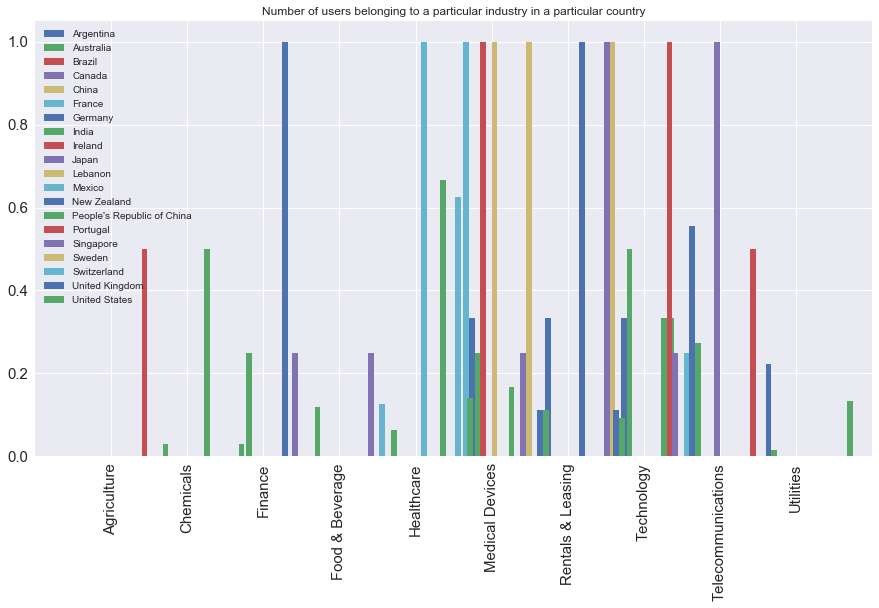

In [3]:
############# Plotting the number of users from each industry from different countries. ##############
############# Gives us an idea about the number of different industries present in different countries.
data1 = demo.dropna()

groups = data1.groupby('Mailing Country')
out = {}
for name, group in groups:
    temp = group['Industry'].value_counts()/group.shape[0]
    out[name] = temp
df = pd.DataFrame(out)

df.plot.bar(figsize=(15,8), title='Number of users belonging to a particular industry in a particular country', fontsize=15, width = 1.5)

### Plotting the number of users from each industry and what function that they handle in that industry.

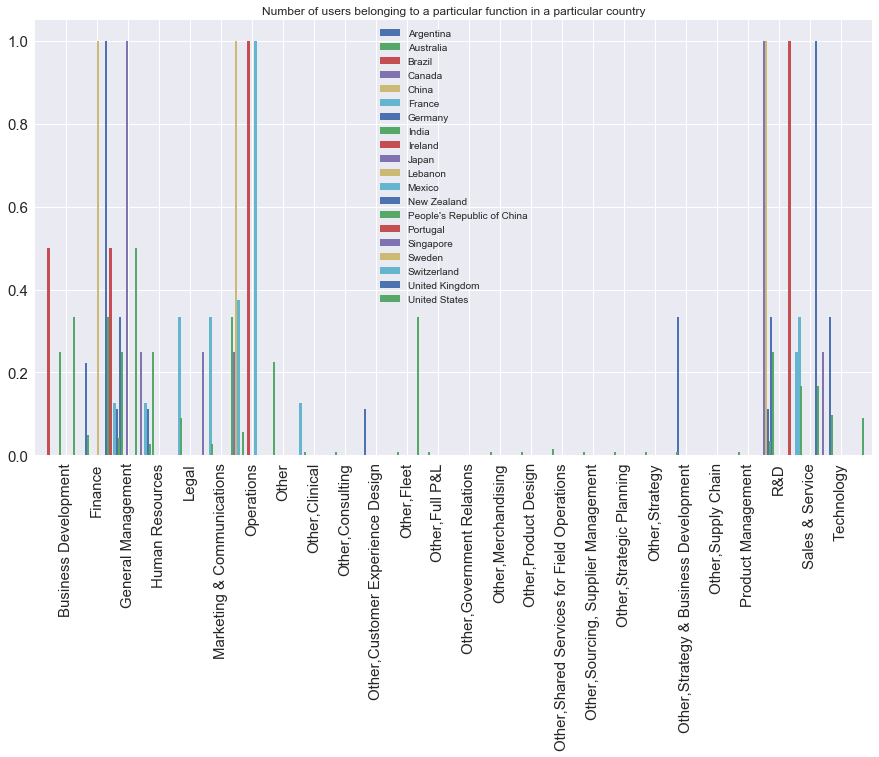

In [7]:
############# Plotting the number of users from each industry from different functions. ##############
############# Gives us an idea about the number of different functions present in different countries and which are dominant.
data2 = demo.dropna()

groups = data2.groupby('Mailing Country')
out = {}
for name, group in groups:
    temp = group['Function'].value_counts()/group.shape[0]
    out[name] = temp
df1 = pd.DataFrame(out)

df1.plot.bar(figsize=(15,8), title='Number of users belonging to a particular function in a particular country', fontsize=15, width = 1.5)

### Plotting the frequency of visits of each engageable type , for the top 5 organizations contributing the maximum number of users.

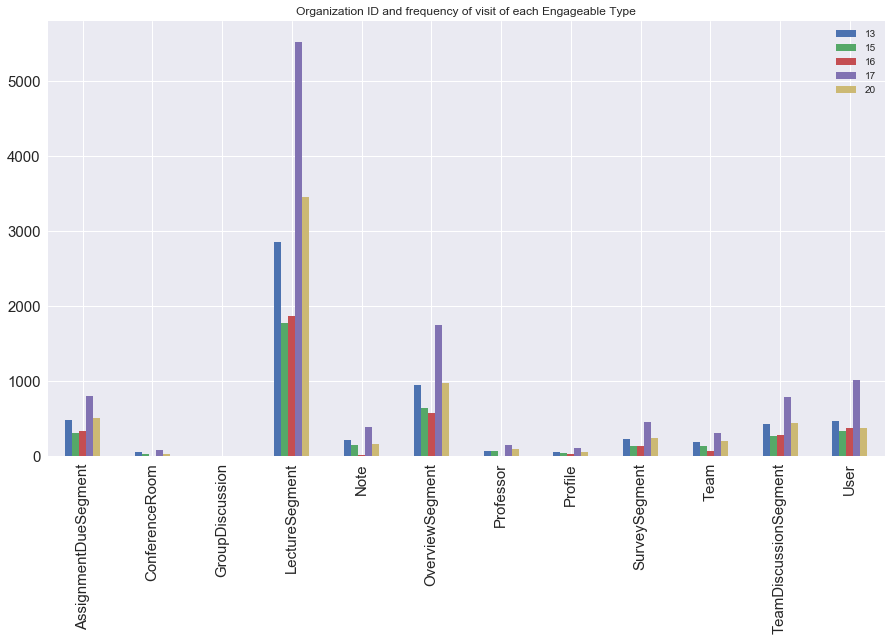

In [8]:
################### For the top 5 organizations contributing the max number of users, the graph below shows
################### which engageable type was visited how many times.
################### The code for finding out the top 5 organizations was implemented in R.
data3 = login.dropna()
a = [1, 10, 6, 9, 12, 19, 21, 3, 4, 18, 5, 7, 8, 11, 2, 14] # leaving out the organizations which are not in top 5
mask1 = np.logical_not(data3['organization_id'].isin(a))
data4 = data3[mask1]
groups = data4.groupby('organization_id')
out = {}
for name, group in groups:
    temp = group['engageable_type'].value_counts()
    out[name] = temp
df2 = pd.DataFrame(out)

df2.plot.bar(figsize=(15, 8), title='Organization ID and frequency of visit of each Engageable Type', fontsize=15)

### Combining the information in the two data sets. Adding the country column in login data set for each user by picking the country of that particular user from the demographics data set.

In [9]:
login['Country'] = ''
for i in range(len(demo)):
    login['Country'][login['User_ID'] == demo['User_ID'][i]] = demo['Mailing Country'][i]

In [10]:
login.head() #Checking whether it worked perfectly or not.

,course_id,User_ID,activity_type,engageable_type,engageable_id,created_at,organization_id,Country
0,13,003F000001ZzqrT,login,User,1546,02/12/14 15:00,13,France
1,13,003F000001ZzqrT,complete,OverviewSegment,546,23/11/14 11:58,13,France
2,13,003F000001ZzqrT,show,OverviewSegment,546,23/11/14 11:56,13,France
3,13,003F000001ZzqrT,complete,AssignmentDueSegment,692,23/11/14 11:55,13,France
4,13,003F000001ZzqrT,show,AssignmentDueSegment,692,23/11/14 11:54,13,France


In [11]:
result = pd.concat([demo, login], axis=1, join='outer') # This can also be done to add the country column for each user.

### Plotting the frequency of visits of each engageable type for the users belonging to different countries for the top countries which contribute maximum number of users.

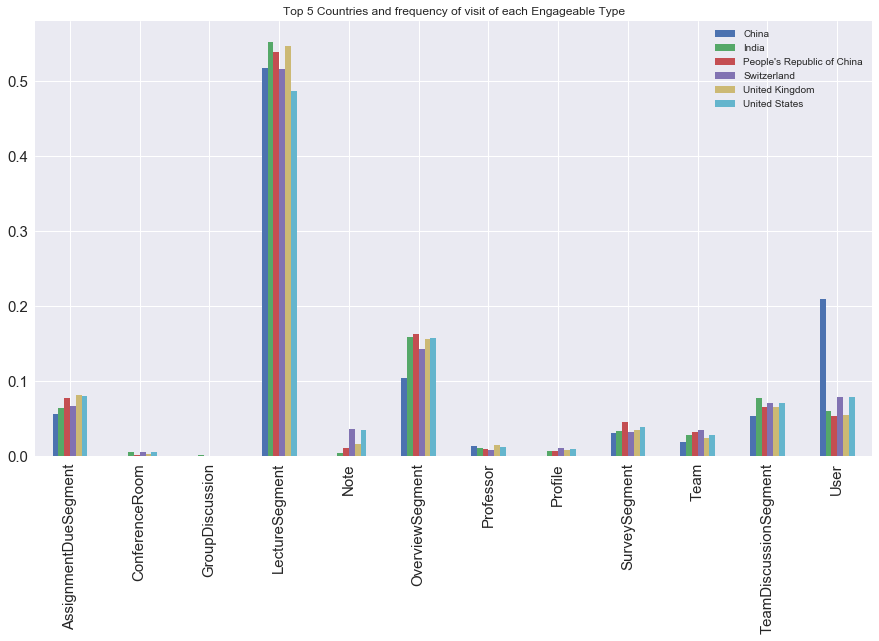

In [13]:
data5 = login.dropna()

b = ['Argentina','Australia','Brazil','Japan','Lebanon','Ireland','Singapore','Sweden','Portugal','UAE','New Zealand','France','Germany','Mexico','Canada',''] 
mask2 = np.logical_not(data5['Country'].isin(b))
data6 = data5[mask2]
groups = data6.groupby('Country')
out = {}
for name, group in groups:
    temp = group['engageable_type'].value_counts()/group.shape[0]
    out[name] = temp
df2 = pd.DataFrame(out)

df2.plot.bar(figsize=(15, 8), title='Top 5 Countries and frequency of visit of each Engageable Type', fontsize=15)

### Plotting the frequency of visits of each engageable type for the users belonging to North American Countries.

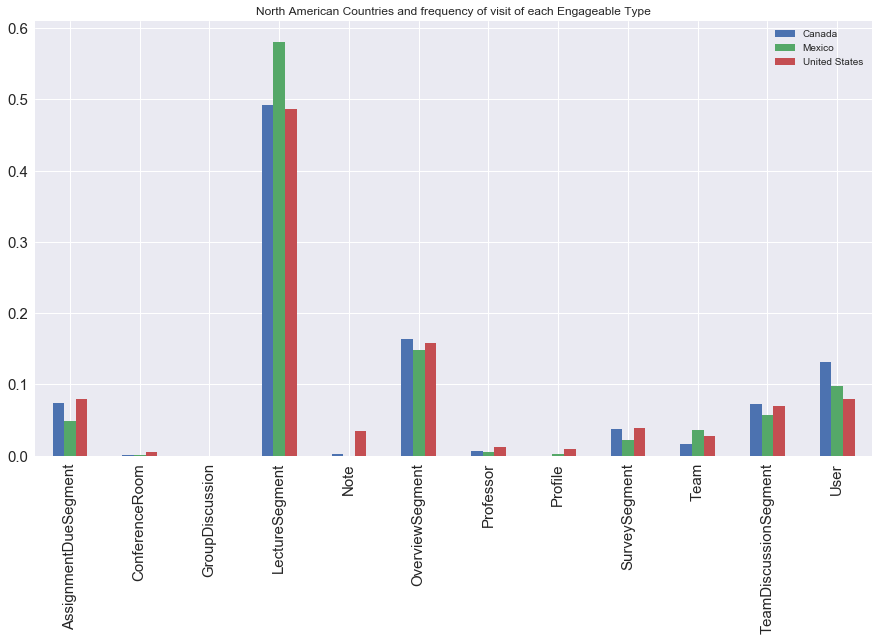

In [14]:
data7 = login.dropna()

c = ['Argentina','Australia','Brazil','Japan','Lebanon','Ireland','Singapore','Sweden','Portugal','UAE','New Zealand','France','Germany', 'India','China',"People's Republic of China",'United Kingdom','Switzerland',''] 
mask3 = np.logical_not(data7['Country'].isin(c))
data8 = data7[mask3]
groups = data8.groupby('Country')
out = {}
for name, group in groups:
    temp = group['engageable_type'].value_counts()/group.shape[0]
    out[name] = temp
df3 = pd.DataFrame(out)

df3.plot.bar(figsize=(15, 8), title='North American Countries and frequency of visit of each Engageable Type', fontsize=15)

### Plotting the frequency of visits of each engageable type for the users belonging to European Countries.

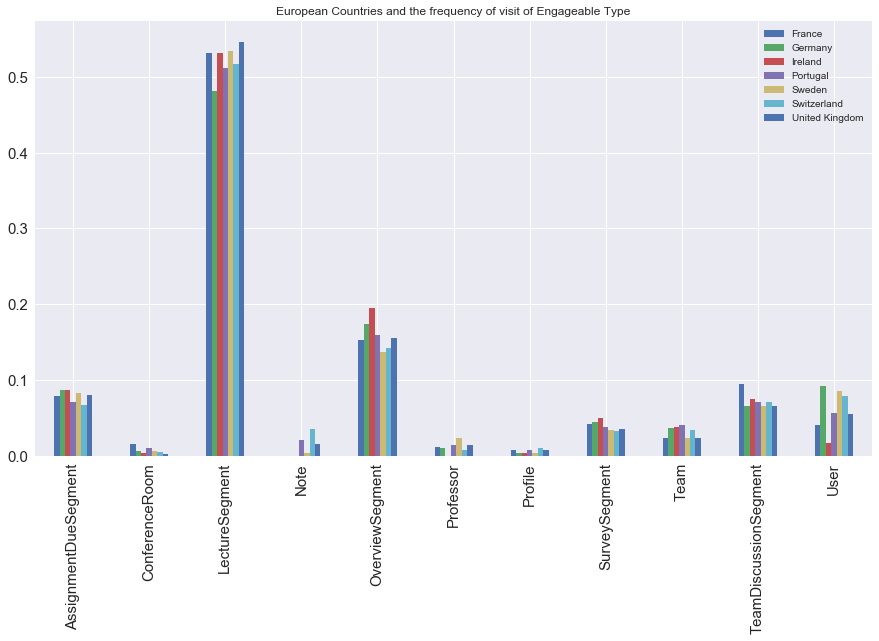

In [15]:
data9 = login.dropna()

d = ['Argentina','Australia','Brazil','Japan','Singapore','Lebanon','UAE','New Zealand','India','China',"People's Republic of China",'United States','Mexico','Canada',''] 
mask4 = np.logical_not(data9['Country'].isin(d))
data10 = data9[mask4]
groups = data10.groupby('Country')
out = {}
for name, group in groups:
    temp = group['engageable_type'].value_counts()/group.shape[0]
    out[name] = temp
df4 = pd.DataFrame(out)

df4.plot.bar(figsize=(15, 8), title='European Countries and the frequency of visit of Engageable Type', fontsize=15)

### Plotting the frequency of visits of each engageable type for the users belonging to Asian Countries, Australia and New Zealand.

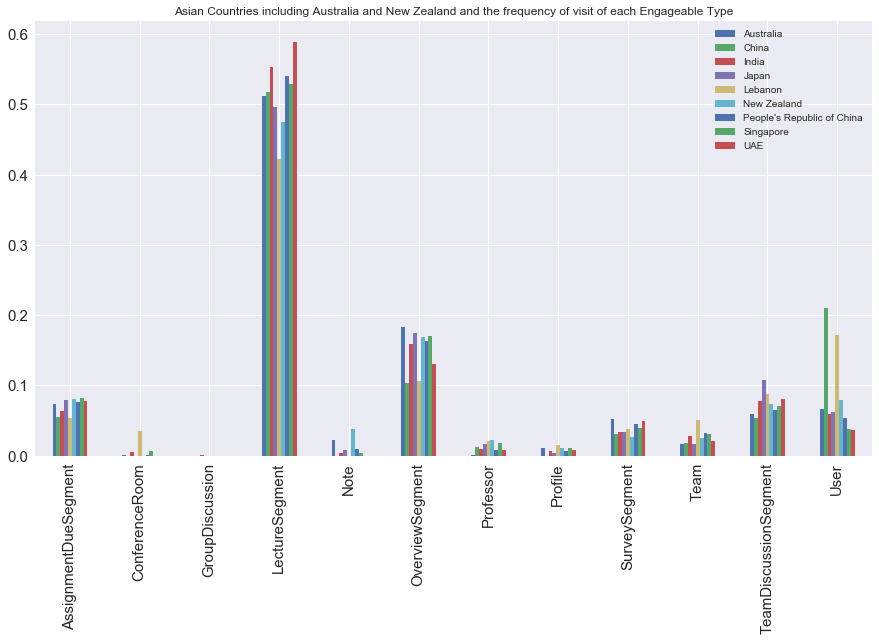

In [16]:
data11 = login.dropna()

e = ['Argentina','Brazil','Portugal','France','Germany','Ireland','Portugal','Sweden','Switzerland','United Kingdom','United States','Mexico','Canada',''] 
mask5 = np.logical_not(data11['Country'].isin(e))
data12 = data11[mask5]
groups = data12.groupby('Country')
out = {}
for name, group in groups:
    temp = group['engageable_type'].value_counts()/group.shape[0]
    out[name] = temp
df5 = pd.DataFrame(out)

df5.plot.bar(figsize=(15, 8), title='Asian Countries including Australia and New Zealand and the frequency of visit of each Engageable Type', fontsize=15)